In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bike Details Dataset (EDA-1)


In [ ]:
#1 What is the range of selling prices in the dataset?

df=pd.read_csv('BIKE DETAILS.csv')
df.head()

# Calculate the minimum and maximum selling prices
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()

# Calculate the range of selling prices
range_price = max_price - min_price


print(f"Minimum Selling Price: {min_price}")
print(f"Maximum Selling Price: {max_price}")
print(f"Range of Selling Prices: {range_price}")

Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of Selling Prices: 755000


In [ ]:
#2 What is the median selling price for bikes in the dataset?

median_selling_price =  df['selling_price'].median()
print(f"Median selling price: {median_selling_price}")

Median selling price: 45000.0


In [ ]:
#3 What is the most common seller type?

x=df['seller_type'].value_counts()

most_coomon_seller = x.idxmax()
most_coomon_seller_count = x.max()

print(f"Most common seller type: {most_coomon_seller} and its count is {most_coomon_seller_count}")

Most common seller type: Individual and its count is 1055


In [ ]:
#4 How many bikes have driven more than 50,000 kilometers?

a=df['km_driven'] > 50000

bike_count = a.sum()
bike_count


170

In [ ]:
#5 What is the average km_driven value for each ownership type?

df.groupby('owner')['km_driven'].agg('mean')


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
#6 What proportion of bikes are from the year 2015 or older?

bikes_2015_or_older = df[df['year'] <= 2015]

proportion = len(bikes_2015_or_older)/ len(df)

print(f"proportion of bikes are from the year 2015 or older : {proportion}")

proportion of bikes are from the year 2015 or older : 0.5664467483506126


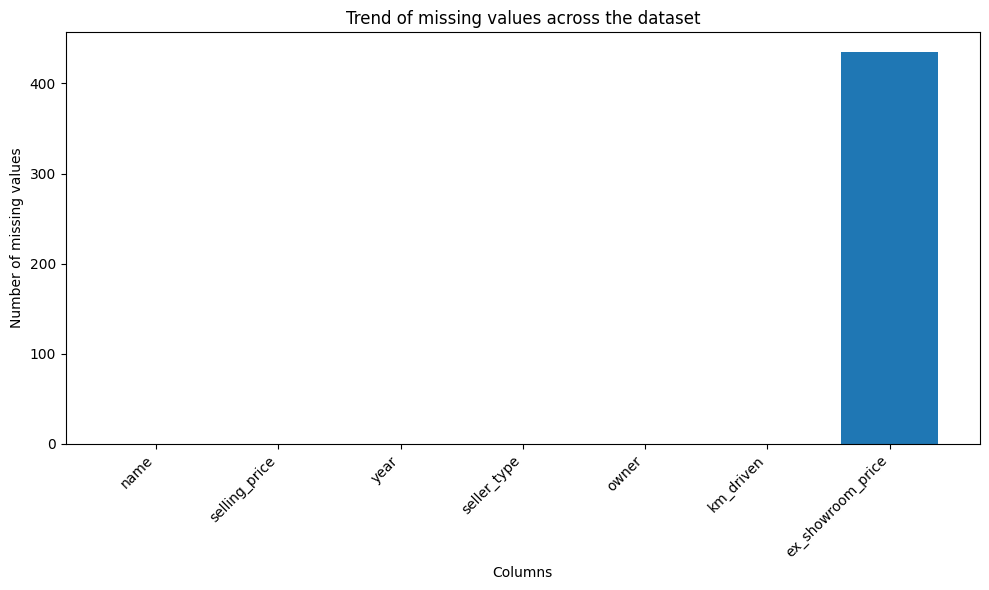

In [ ]:
#7 What is the trend of missing values across the dataset?

trend = df.isnull().sum()

plt.figure(figsize=(10,6))
plt.bar(trend.index, trend.values)
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.title('Trend of missing values across the dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#8 What is the highest ex_showroom_price recorded, and for which bike?


# Find the row with the highest ex_showroom_price
highest_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Extract the bike name and the highest ex_showroom_price
highest_price_bike_name = highest_price_row['name']
highest_price_value = highest_price_row['ex_showroom_price']


print(f"The highest ex_showroom_price is {highest_price_bike_name} with a price of {highest_price_value}")

The highest ex_showroom_price is Harley-Davidson Street Bob with a price of 1278000.0


In [ ]:
#9 What is the total number of bikes listed by each seller type?

df.groupby('seller_type').size()

,0
seller_type,
Dealer,6
Individual,1055


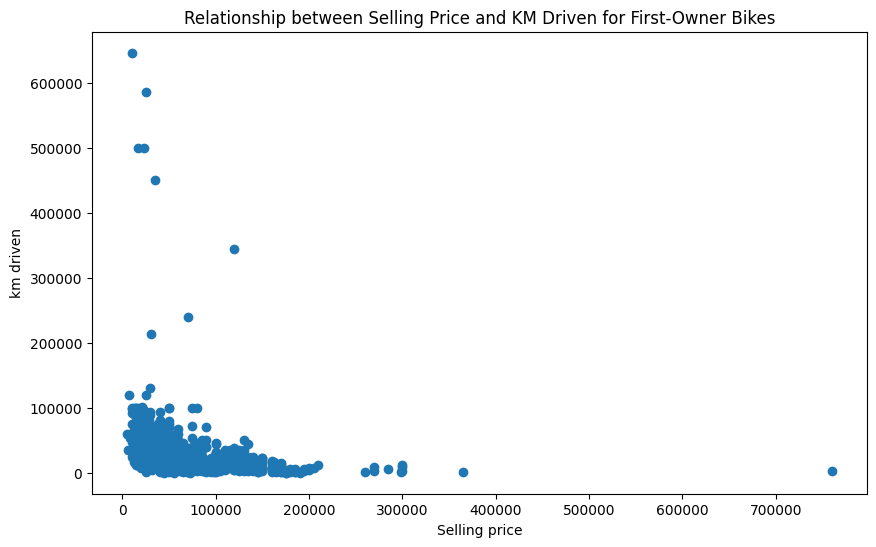

In [ ]:
#10 What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = df[df['owner']=='1st owner']

plt.figure(figsize=(10,6))
plt.scatter(x= 'selling_price', y= 'km_driven', data = first_owner_bikes)
plt.xlabel('Selling price')
plt.ylabel('km driven')
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.show()

In [ ]:
#11 Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

df_filter= df[(df['km_driven'] > lower_fence)  & df['km_driven'] < upper_fence]

df_filter.shape

(1061, 7)

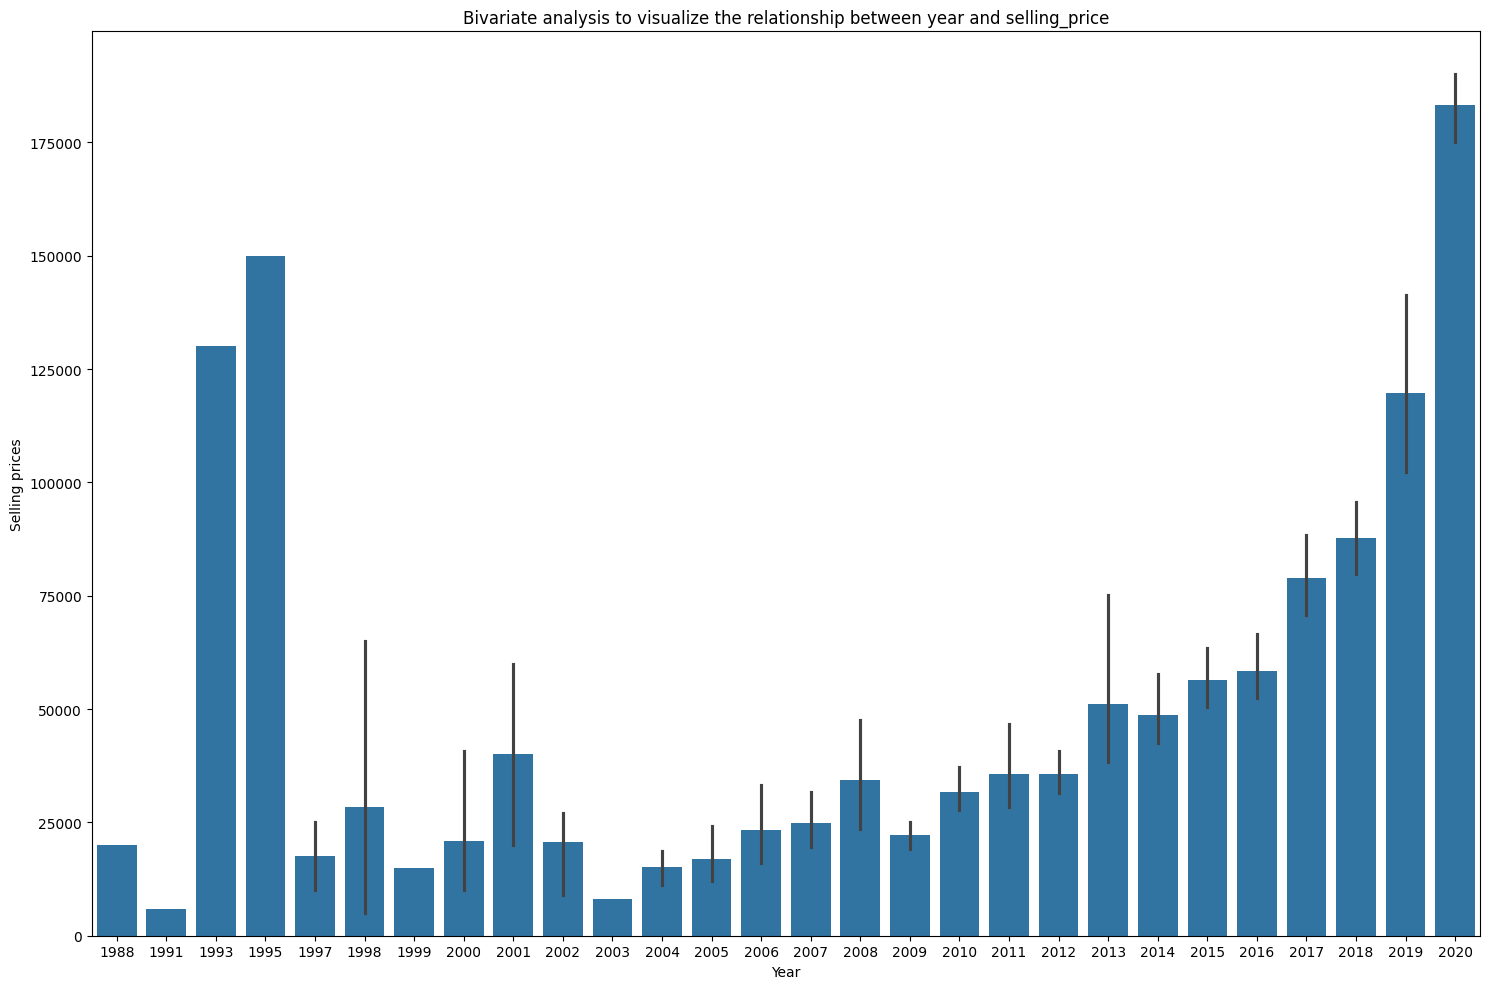

In [ ]:
#12 Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(15,10))
sns.barplot(x=df['year'], y= df['selling_price'], estimator=np.mean)
plt.xlabel('Year')
plt.ylabel('Selling prices')
plt.title('Bivariate analysis to visualize the relationship between year and selling_price')
plt.tight_layout()
plt.show()

In [ ]:
#13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025

df['bike_age'] = current_year - df['year']

#  Group by bike's age and calculate the average selling price for each age
depreciation= df.groupby('bike_age')['selling_price'].agg('mean')
print(depreciation)

bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [ ]:
#14 Which bike names are priced significantly above the average price for their manufacturing year?


# Calculate the average selling price for each year
avg_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_per_year.rename(columns={'selling_price' : 'avg_selling_price'}, inplace=True)


# Merge the average price with the original DataFrame to compare each bike's price
df_with_avg = pd.merge(df, avg_price_per_year , on='year')

threshold = 1.5 # Define the threshold (1.5x the average selling price for that year)

# Identify bikes priced above the threshold
df_with_avg['is_above_avg'] = df_with_avg['selling_price'] > threshold * df_with_avg['avg_selling_price']

# Filter bikes that are priced above the threshold
highest_price_bike_name = df_with_avg[df_with_avg['is_above_avg']]

print(highest_price_bike_name[['year', 'name', 'selling_price', 'avg_selling_price']].head(10))

    year                                  name  selling_price  \
2   2018   Royal Enfield Classic Gunmetal Grey         150000   
7   2008  Royal Enfield Bullet 350 [2007-2011]         180000   
13  2019                         Yamaha YZF R3         365000   
18  2018   Royal Enfield Classic Gunmetal Grey         150000   
23  2019                         Jawa Standard         180000   
24  2016         Royal Enfield Thunderbird 350         110000   
37  2016                        Honda CBR-250R         120000   
39  2015         Royal Enfield Thunderbird 350          90000   
40  2017                     Bajaj Dominar 400         125000   
42  2017                          KTM 390 Duke         175000   

    avg_selling_price  
2        87660.374046  
7        34289.285714  
13      119689.511628  
18       87660.374046  
23      119689.511628  
24       58469.018692  
37       58469.018692  
39       56500.000000  
40       78894.736842  
42       78894.736842  


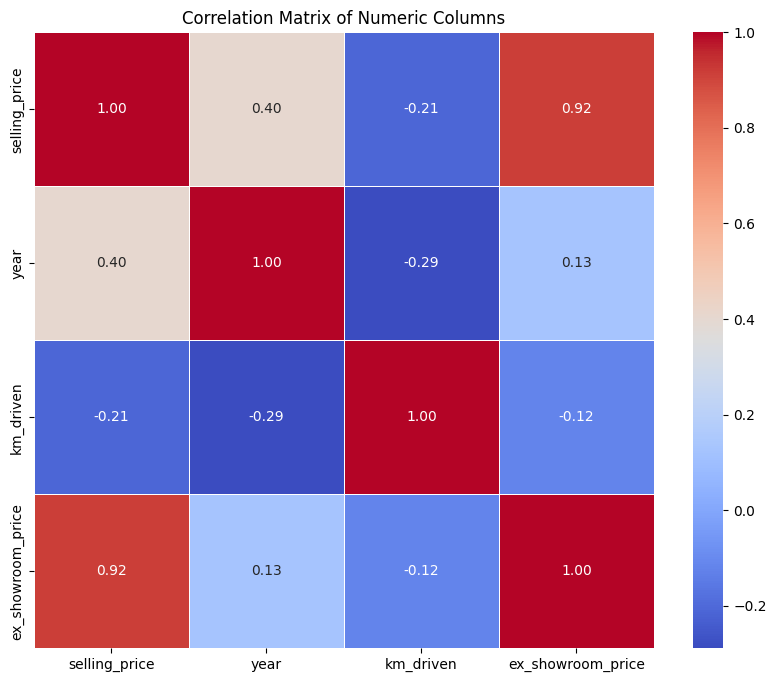

In [ ]:
#15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.


numeric_col = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numeric_col

numeric_col_corr = df[numeric_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_col_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# **Car Sale Dataset (EDA-2)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df2 = pd.read_csv('Car Sale.csv')
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


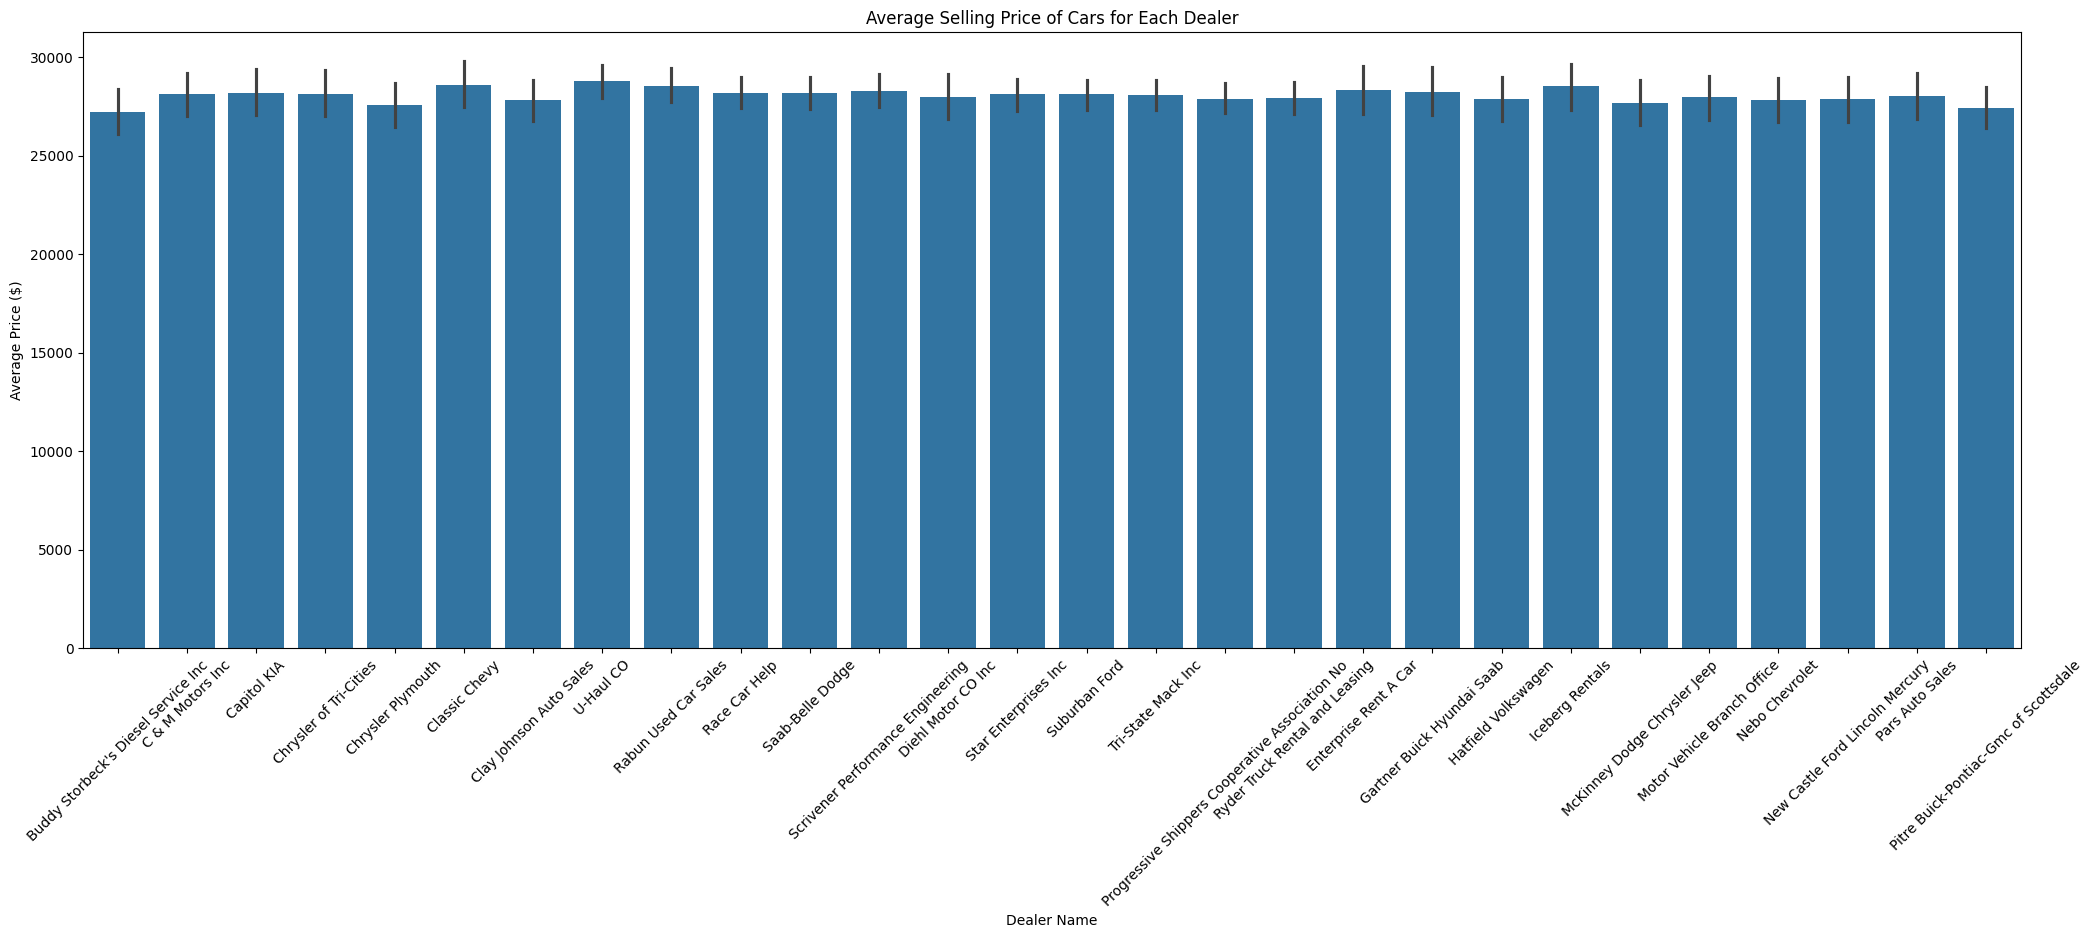

In [ ]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_price = df2.groupby('Dealer_Name')['Price ($)'].agg('mean').reset_index()
avg_price


#Plot the average prices for each dealer

plt.figure(figsize=(25,8))
sns.barplot(x=df2['Dealer_Name'], y=df2['Price ($)'], data=avg_price)
plt.xticks(rotation=45)
plt.title("Average Selling Price of Cars for Each Dealer")
plt.xlabel("Dealer Name")
plt.ylabel("Average Price ($)")
plt.show()


The car brand with the highest variation in prices is Saab with a standard deviation of $21440.46.
     
Saab has the highest price variation based on the standard deviation. This could suggest that Saab offers everything from 
entry-level luxury cars (like sedans) to high-end luxury SUVs or performance vehicles. Customers might be willing to pay a premium for advanced features,
higher-quality materials, or exclusivity, which leads to the price variation within the brand.
       


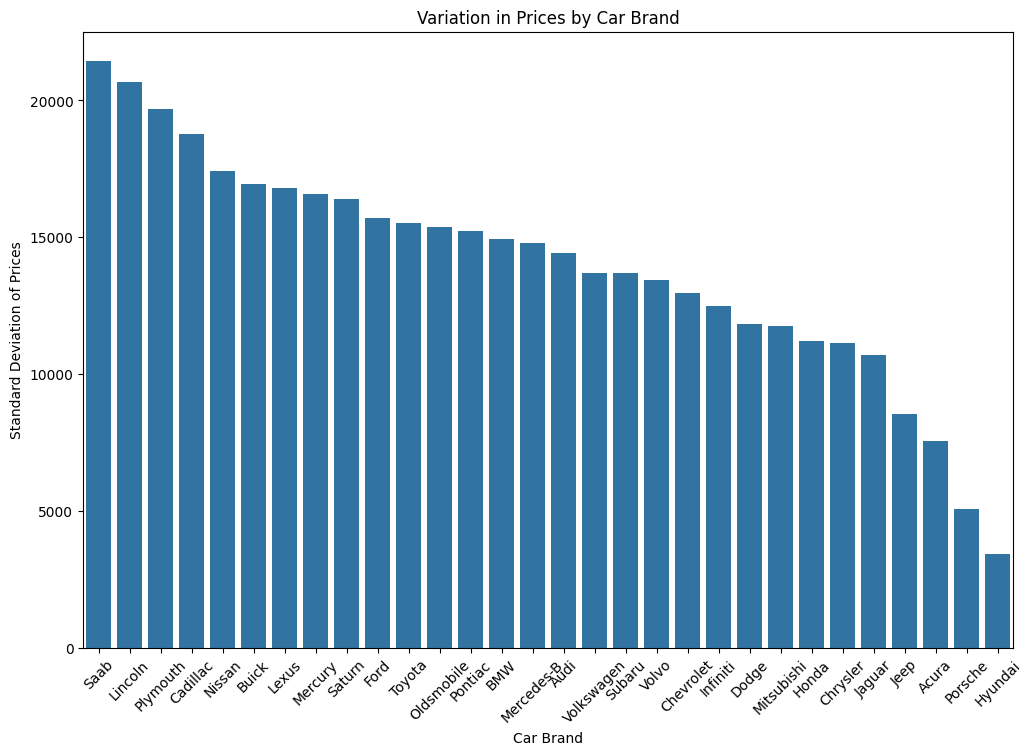

In [ ]:
#2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

std_price = df2.groupby('Company')['Price ($)'].agg('std')

# Sort the companies by price variation in descending order
std_price_sorted = std_price.sort_values(ascending=False)


# Identify the car brand with the highest variation in prices

highest_variation_brand= std_price.idxmax()
highest_variation_value = std_price.max()

# Display the company with the highest price variation
print(f"\nThe car brand with the highest variation in prices is {highest_variation_brand} with a standard deviation of ${highest_variation_value:.2f}.")
print('     ')
print(f'{highest_variation_brand} has the highest price variation based on the standard deviation. This could suggest that {highest_variation_brand} offers everything from \nentry-level luxury cars (like sedans) to high-end luxury SUVs or performance vehicles. Customers might be willing to pay a premium for advanced features,\nhigher-quality materials, or exclusivity, which leads to the price variation within the brand.')
print('       ')

plt.figure(figsize=(12,8))
sns.barplot(x=std_price_sorted.index, y=std_price_sorted.values)
plt.title('Variation in Prices by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Standard Deviation of Prices')
plt.xticks(rotation=45)
plt.show()




In [ ]:
#3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

interquartile = df2.groupby('Transmission')['Price ($)'].agg(
                                                             min_value_price='min',
                                                             max_value_price='max',
                                                             std_value_price='std',
                                                             Q1=lambda x: x.quantile(0.25),
                                                             Q3=lambda x: x.quantile(0.75)
                                                             ).reset_index()


interquartile['Interquartile_range_(IQR)'] = interquartile['Q3'] - interquartile['Q1']

print(interquartile['Interquartile_range_(IQR)'])


print('\n')
print(f"""Both automatic and manual transmission cars have the same Interquartile Range (IQR): {interquartile['Interquartile_range_(IQR)'][0]}.
This indicates that the spread of prices in the middle 50% of the data is identical for both transmission types.
There is no significant difference in price variability between automatic and manual cars.""")



0    17000.0
1    17000.0
Name: Interquartile_range_(IQR), dtype: float64


Both automatic and manual transmission cars have the same Interquartile Range (IQR): 17000.0. 
This indicates that the spread of prices in the middle 50% of the data is identical for both transmission types. 
There is no significant difference in price variability between automatic and manual cars.


In [ ]:
#4 What is the distribution of car prices across different regions?

# Group by 'Dealer_Region' and calculate various statistics on 'Price ($)'
dist_acr_region = df2.groupby('Dealer_Region')['Price ($)'].agg(['min','max','mean','median','std'])

# Rename the columns to make them more descriptive
dist_acr_region.columns = ['Minimum_price', 'Maximum_price', 'mean_price', 'median_price', 'std_price']

dist_acr_region = dist_acr_region.reset_index()

dist_acr_region

,Dealer_Region,Minimum_price,Maximum_price,mean_price,median_price,std_price
0,Aurora,9000,85800,28334.626837,23000.0,15026.207252
1,Austin,9000,85601,28341.603628,23801.0,14903.884549
2,Greenville,1200,85200,28180.819054,22500.0,15101.538328
3,Janesville,4300,85400,27833.350955,23000.0,14344.995638
4,Middletown,1700,85300,27856.338875,22750.0,14619.842395
5,Pasco,9000,85600,28119.039923,23000.0,14659.315941
6,Scottsdale,1450,85001,27954.958928,22600.0,14902.916820


In [ ]:
#5 What is the distribution of cars based on body styles?

dist = df2.groupby('Body Style')['Company'].count()
dist.sort_values(ascending=False)

,Company
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


In [ ]:
#6 How does the average selling price of cars vary by customer gender and annual income?


avg_price_gender_income = df2.groupby(['Gender','Annual Income'])['Price ($)'].mean().reset_index()


print("Average selling price of cars by customer gender and annual income:")
avg_price_gender_income


Average selling price of cars by customer gender and annual income:


,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
Name: Price ($), dtype: int64




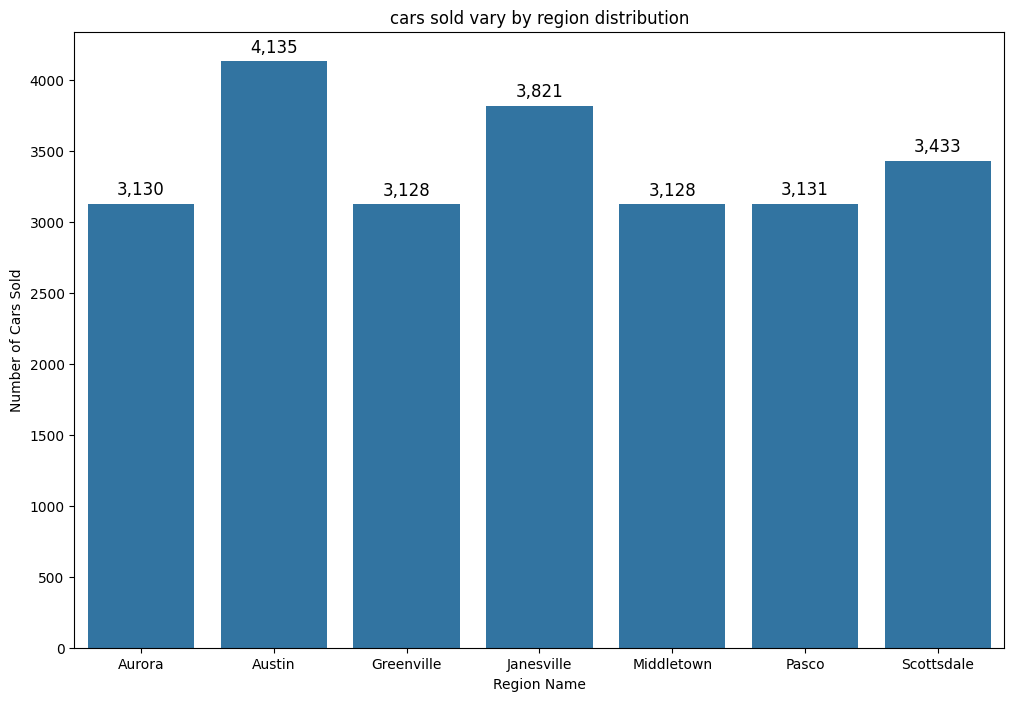

In [ ]:
#7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?

cars_sold_by_region = df2.groupby(['Dealer_Region'])['Price ($)'].agg('size')

print(cars_sold_by_region)
print('\n')

# Plot the number of cars sold by region
plt.figure(figsize=(12,8))
ax = sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)

for p in ax.patches:
  ax.annotate(f'{p.get_height():,.0f}',
              (p.get_x() + p.get_width()/2, p.get_height()),
              ha='center', va='center',
              fontsize=12, color='black',
                xytext=(0, 10),
                textcoords='offset points')


plt.title('cars sold vary by region distribution')
plt.xlabel('Region Name')
plt.ylabel("Number of Cars Sold")
plt.show()

In [ ]:
#8 How does the average car price differ between cars with different engine sizes?

df2.groupby(['Engine'])['Price ($)'].agg('mean').reset_index()

,Engine,Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


In [ ]:
#9 How do car prices vary based on the customer’s annual income bracket?

bins= [0, 50000, 100000, 150000, 200000,float('inf')]
labels = ['0-50k','50k-100k','100k-150k','150k-200k','200k+']

# Bin the 'Annual Income' column into brackets
df2['Income_Bracket'] = pd.cut(df2['Annual Income'], bins=bins, labels=labels)

# Group by the 'Income_Bracket' and calculate the mean price
customer_annual_income_bracket = df2.groupby('Income_Bracket')['Price ($)'].agg('mean').reset_index()

# Rename the columns for clarity
customer_annual_income_bracket.columns=(['Annual Income Bracket', 'Average Price ($)'])
customer_annual_income_bracket

,Annual Income Bracket,Average Price ($)
0,0-50k,27884.29782
1,50k-100k,43000.00000
2,100k-150k,23200.20000
3,150k-200k,22650.40000
4,200k+,28152.04346


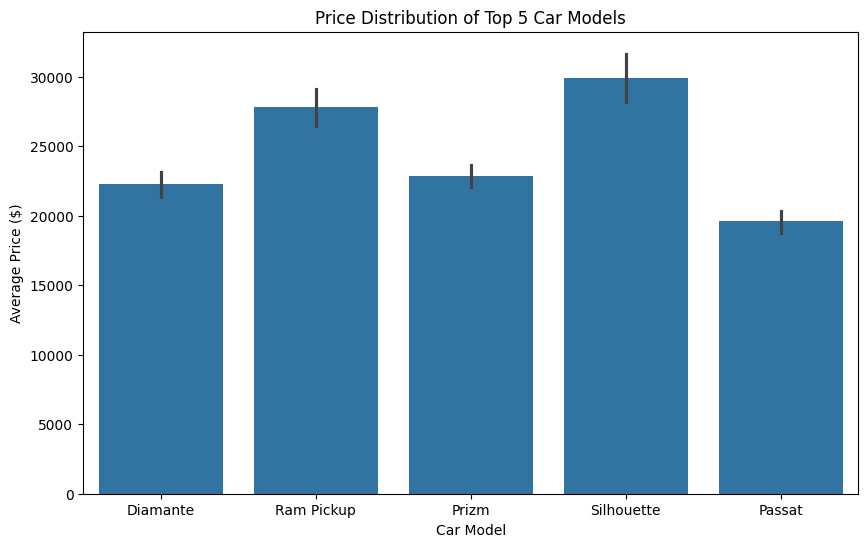

In [ ]:
#10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?

model_count = df2['Model'].value_counts().reset_index()
model_count.columns=['Model', 'Model_count']
top5_model_count = model_count.head(5)

top5_model_count_list = top5_model_count['Model'].tolist()
df_top5 = df2[df2['Model'].isin(top5_model_count_list)]


price_distribution = df_top5.groupby('Model')['Price ($)'].agg('describe')
price_distribution

plt.figure(figsize=(10,6))
sns.barplot(x = 'Model', y = 'Price ($)', data=df_top5)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.show()

In [ ]:
#11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?


# Clean the 'Engine' column to remove unwanted characters
df2['Engine']=df2['Engine'].str.replace('Â\xa0', ' ', regex= True)

# Filter for "Double" engines
Double_engine = df2[df2['Engine'].str.startswith('Double')]

# Filter for "Overhead" engines
Overhead_Camshaft = df2[df2['Engine'].str.startswith('Overhead')]

# Calculate the price variation (standard deviation) for each car color for "Double" engines
a = Double_engine.groupby('Color')['Price ($)'].std()
print(a)
# Calculate the price variation (standard deviation) for each car color for "Overhead" engines
b = Overhead_Camshaft.groupby('Color')['Price ($)'].std()
print(b)


# Finding the color with the highest price variation for each engine type
max_variation_double = a.idxmax()

max_variation_overhead = b.idxmax()

print(f"\nColor with the highest price variation for Double Overhead Camshaft: {max_variation_double}")
print(f"Color with the highest price variation for Overhead Camshaft: {max_variation_overhead}")

Color
Black         12418.674126
Pale White    14402.413401
Red           13499.354247
Name: Price ($), dtype: float64
Color
Black         17457.405345
Pale White    13000.103061
Red           17346.642554
Name: Price ($), dtype: float64

Color with the highest price variation for Double Overhead Camshaft: Pale White
Color with the highest price variation for Overhead Camshaft: Black


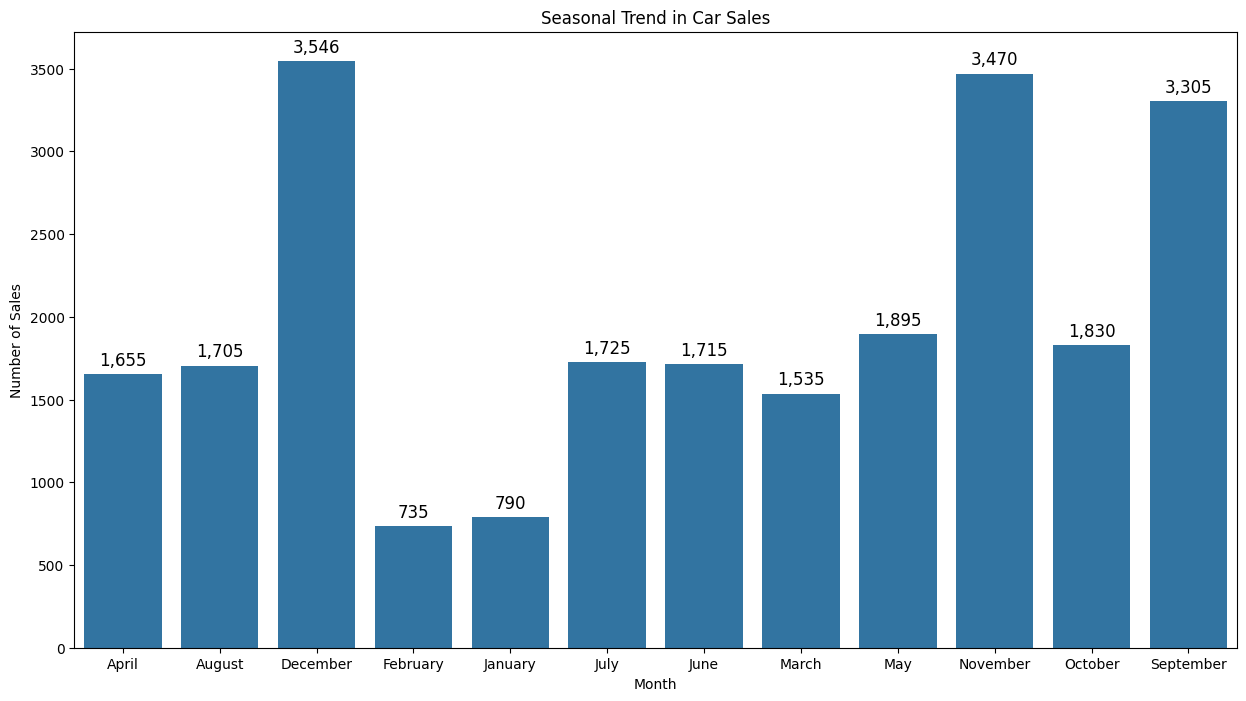

In [ ]:
#12 Is there any seasonal trend in car sales based on the date of sale?

df2['Date']= pd.to_datetime(df2['Date'])
df2['Month']=df2['Date'].dt.month_name()
df2['Year'] = df2['Date'].dt.year

monthly_sales = df2.groupby('Month')['Price ($)'].count()

plt.figure(figsize=(15,8))
ax=sns.barplot(x=monthly_sales.index, y=monthly_sales.values)

for p in ax.patches:
  ax.annotate(f'{p.get_height():,.0f}',
              (p.get_x()+p.get_width()/2, p.get_height()),
              ha='center', va='center',
              fontsize =12, color='black',
              xytext=(0,10),
              textcoords='offset points')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


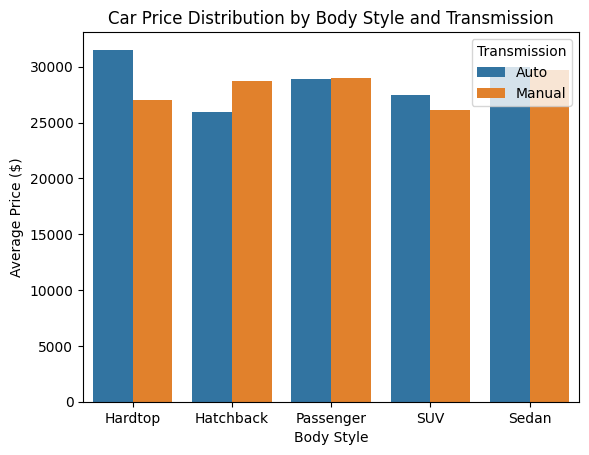

In [ ]:
#13 How does the car price distribution change when considering different combinations of body style and transmission type?

price_dist = df2.groupby(['Body Style', 'Transmission'])['Price ($)'].mean().reset_index()

sns.barplot(x='Body Style' , y='Price ($)', hue='Transmission', data=price_dist)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Average Price ($)')
plt.show()

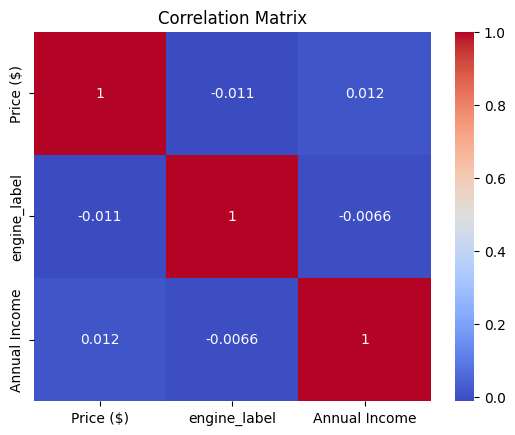

Car Price ($) vs. Engine Size (engine_label):
  Correlation: -0.011
  Interpretation: A very weak negative correlation, indicating that the type of engine (Double Overhead Camshaft vs. Overhead Camshaft) has almost no linear relationship with the car price.

Car Price ($) vs. Annual Income:
  Correlation: 0.012
  Interpretation: A very weak positive correlation, suggesting that the car price and customer annual income are not strongly related.

Engine Size vs. Annual Income:
  Correlation: -0.0066
  Interpretation: A very weak negative correlation, indicating that the engine type and customer annual income are almost unrelated.



In [ ]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

df2['Engine']=df2['Engine'].replace('Â\xa0', ' ', regex=True)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df2['engine_label'] = label.fit_transform(df2['Engine'])


corr = df2[['Price ($)', 'engine_label', 'Annual Income']].dropna().corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Define the correlations
correlations = {
    "Car Price ($) vs. Engine Size (engine_label)": -0.011,
    "Car Price ($) vs. Annual Income": 0.012,
    "Engine Size vs. Annual Income": -0.0066
}

# Interpretations
interpretations = {
    "Car Price ($) vs. Engine Size (engine_label)": (
        "A very weak negative correlation, indicating that the type of engine "
        "(Double Overhead Camshaft vs. Overhead Camshaft) has almost no linear "
        "relationship with the car price."
    ),
    "Car Price ($) vs. Annual Income": (
        "A very weak positive correlation, suggesting that the car price and customer "
        "annual income are not strongly related."
    ),
    "Engine Size vs. Annual Income": (
        "A very weak negative correlation, indicating that the engine type and customer "
        "annual income are almost unrelated."
    )
}

# Print the results
for key in correlations:
    print(f"{key}:")
    print(f"  Correlation: {correlations[key]}")
    print(f"  Interpretation: {interpretations[key]}")
    print()


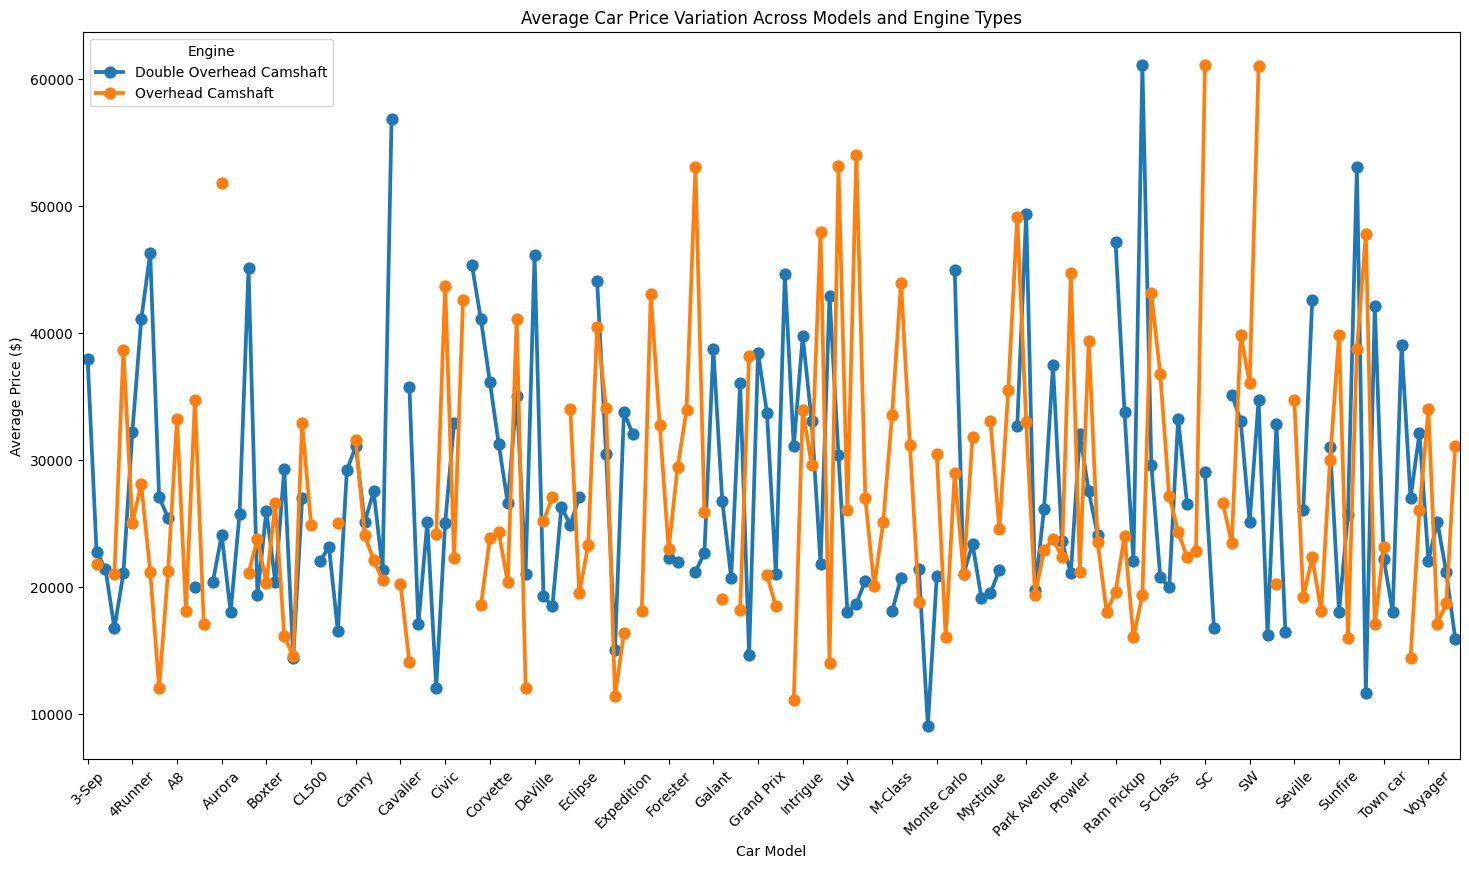

In [ ]:
#15 How does the average car price vary across different car models and engine types?

avg_price_variation = df2.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()   # Group by 'Model' and 'Engine', then calculate the average price


plt.figure(figsize=(15,8))
sns.pointplot(x = 'Model', y ='Price ($)', hue = 'Engine', data=avg_price_variation)
plt.tight_layout()

# Only show every nth x-tick label (e.g., every 5th model label)
plt.xticks(ticks=range(0, len(avg_price_variation['Model'].unique()), 5),
           labels=avg_price_variation['Model'].unique()[::5], rotation=45)

plt.title('Average Car Price Variation Across Models and Engine Types')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.show()

# Car Sale Dataset (EDA-3)
















In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df3 = pd.read_csv('amazon.csv')
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
#1 What is the average rating for each product category?


df3['rating'] =df3['rating'].replace('|', np.nan)
df3['rating'] = df3['rating'].astype(float)


avg_rating = df3.groupby(['category'])['rating'].agg('mean').reset_index()
avg_rating

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [ ]:
# 2 What are the top rating_count products by category?

df3['rating_count'] = pd.to_numeric(df3['rating_count'].replace(',', ''), errors='coerce')
df3['rating_count'] = df3['rating_count'].astype(int, errors='ignore')

top_rating_count = df3.groupby(['category'])['rating_count'].agg('max').reset_index()
top_rating_count.sort_values(by =['rating_count'] ,ascending=False).head(1)   #'by' argument to specify the column for sorting


,category,rating_count
89,"Electronics|HomeTheater,TV&Video|Accessories|C...",426973.0


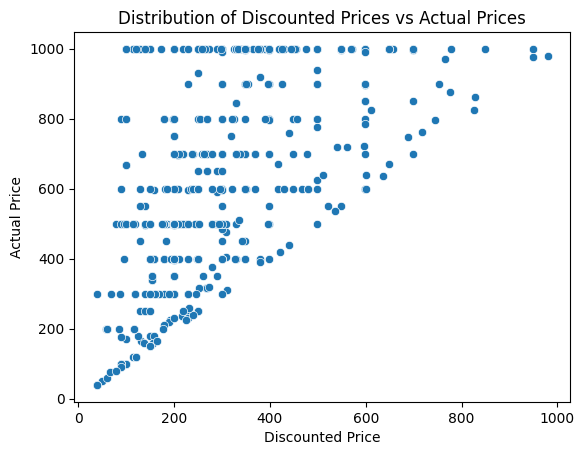

In [ ]:
#3 What is the distribution of discounted prices vs. actual prices?

a=pd.to_numeric(df3['discounted_price'].str.replace('₹', ''), errors='coerce')
b=pd.to_numeric(df3['actual_price'].str.replace('₹', ''), errors='coerce')

sns.scatterplot(x =a, y=b)
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()

In [ ]:
#4 How does the average discount percentage vary across categories?

df3['discount_percentage']= pd.to_numeric(df3['discount_percentage'].replace('%', ''),errors='coerce')

avg_dis = df3.groupby(['category'])['discount_percentage'].mean().reset_index()
avg_dis.dropna()

,category,discount_percentage
0,Car&Motorbike|CarAccessories|InteriorAccessori...,42.0
1,Computers&Accessories|Accessories&Peripherals|...,78.5
2,Computers&Accessories|Accessories&Peripherals|...,35.0
3,Computers&Accessories|Accessories&Peripherals|...,56.5
4,Computers&Accessories|Accessories&Peripherals|...,46.5
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,5.0
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,17.5
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,13.0


In [ ]:
#5 What are the most popular product names?

df3['rating'] = pd.to_numeric(df3['rating'].replace('|', ''), errors='coerce')

def filter(f):
    if f >= float(4.8):
      return f
    return np.nan

filter_df = df3[df3['rating'].apply(filter).notna()]
filter_df=filter_df[['product_name','category','rating']]

filter_df

,product_name,category,rating
174,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,5.0
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,5.0
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,5.0
1145,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8
1201,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8


In [ ]:
 #6 What are the most popular product keywords?


from collections import Counter
import re

# Combine all product names into a single string
product_text = " ".join(df3["product_name"].astype(str))

# Tokenize: Remove special characters and split into words
words = re.findall(r'\b\w+\b', product_text.lower())

# Count word frequencies
word_counts = Counter(words)

# Define stopwords and unwanted elements (single letters, numbers)
stopwords = {"with", "for", "and", "to", "in", "the", "on", "of", "by", "a", "an", "is", "at", "this"}
filtered_keywords = [(word, count) for word, count in word_counts.most_common(15)
                     if word not in stopwords and len(word) > 1 and not word.isdigit()]

# Display refined top keywords
print("Top Product Keywords:")
for word, count in filtered_keywords:
    print(f"{word}: {count}")



Top Product Keywords:
black: 530
usb: 417
cable: 414
charging: 247
type: 243
fast: 212


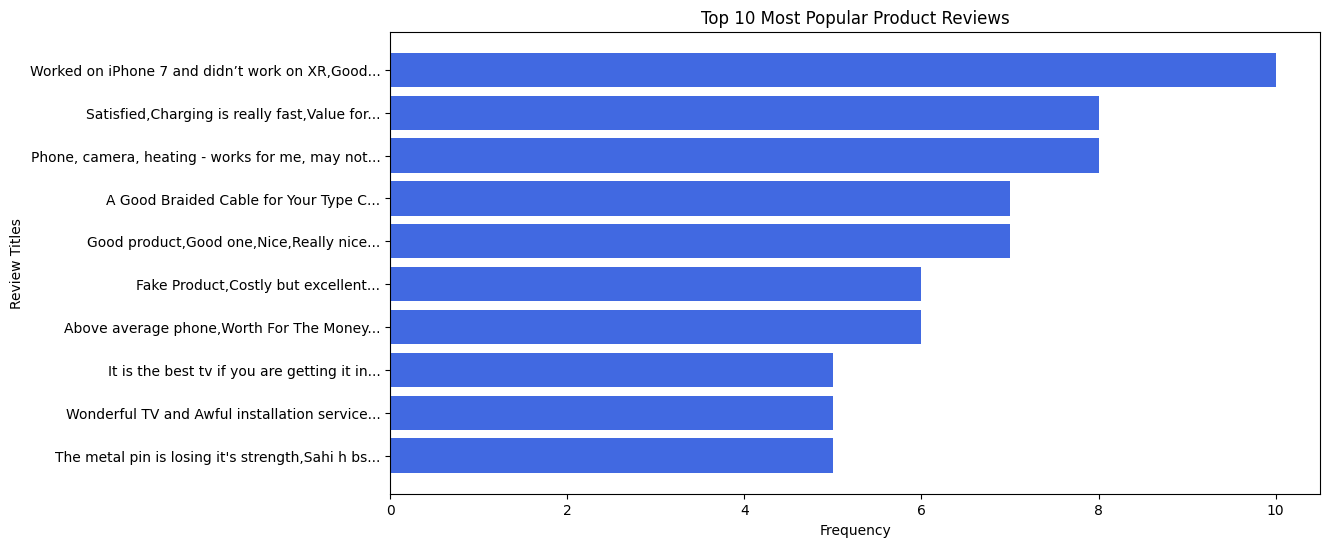

In [ ]:
#7 What are the most popular product reviews?


from collections import Counter
import textwrap

# Count the most common review titles (handling missing values)
review_title_counts = Counter(df3["review_title"].dropna())

# Get the top 10 most common review titles
most_common_reviews = review_title_counts.most_common(10)

# Extract review titles and their counts
review_titles, review_counts = zip(*most_common_reviews)


# Shorten review titles for better visualization
short_review_titles = [textwrap.shorten(title, width=50, placeholder="...") for title in review_titles]

# Create a better-formatted bar chart
plt.figure(figsize=(12, 6))
plt.barh(short_review_titles, review_counts, color='royalblue')
plt.xlabel("Frequency")
plt.ylabel("Review Titles")
plt.title("Top 10 Most Popular Product Reviews")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


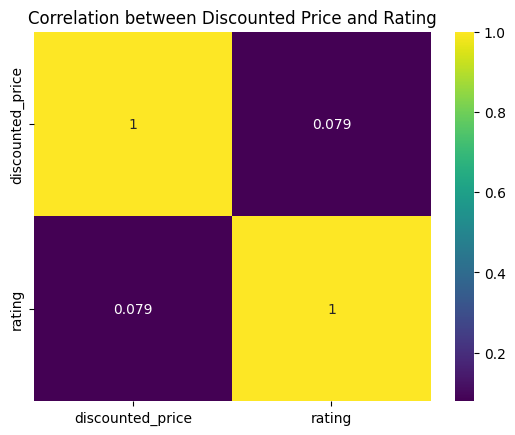

In [ ]:
#8 What is the correlation between discounted_price and rating?

df3['discounted_price'] = pd.to_numeric(df3['discounted_price'].str.replace("₹", ""), errors='coerce')

corr = df3[['discounted_price','rating']].dropna().corr()

sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation between Discounted Price and Rating')
plt.show()



In [ ]:
#9 What are the Top 5 categories based on the highest ratings?

# Group by 'category' and calculate the maximum rating for each category
highest_rating_cat = df3.groupby(['category'])['rating'].max().reset_index()

sorting = highest_rating_cat.sort_values(by='rating', ascending=False)
sorting.head(5)

,category,rating
18,Computers&Accessories|Accessories&Peripherals|...,5.0
10,Computers&Accessories|Accessories&Peripherals|...,5.0
159,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8
140,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8
155,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8


Low-Rated Products:
                                           product_name  rating  rating_count
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...     2.8          87.0
1243  Personal Size Blender, Portable Blender, Batte...     2.3          13.0
1286  MR. BRAND Portable USB Juicer Electric USB Jui...     2.8         109.0
1309  Khaitan ORFin Fan heater for Home and kitchen-...     2.0           2.0
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...     2.6          24.0

High Discount but Low Rating:
                                           product_name  discount_percentage  \
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...                 86.0   
1243  Personal Size Blender, Portable Blender, Batte...                 55.0   
1286  MR. BRAND Portable USB Juicer Electric USB Jui...                 77.0   
1449  IONIX Tap filter Multilayer | Activated Carbon...                 72.0   

      rating  
545      2.8  
1243     2.3  
1286     2.8  
1449     2.9  

Poor

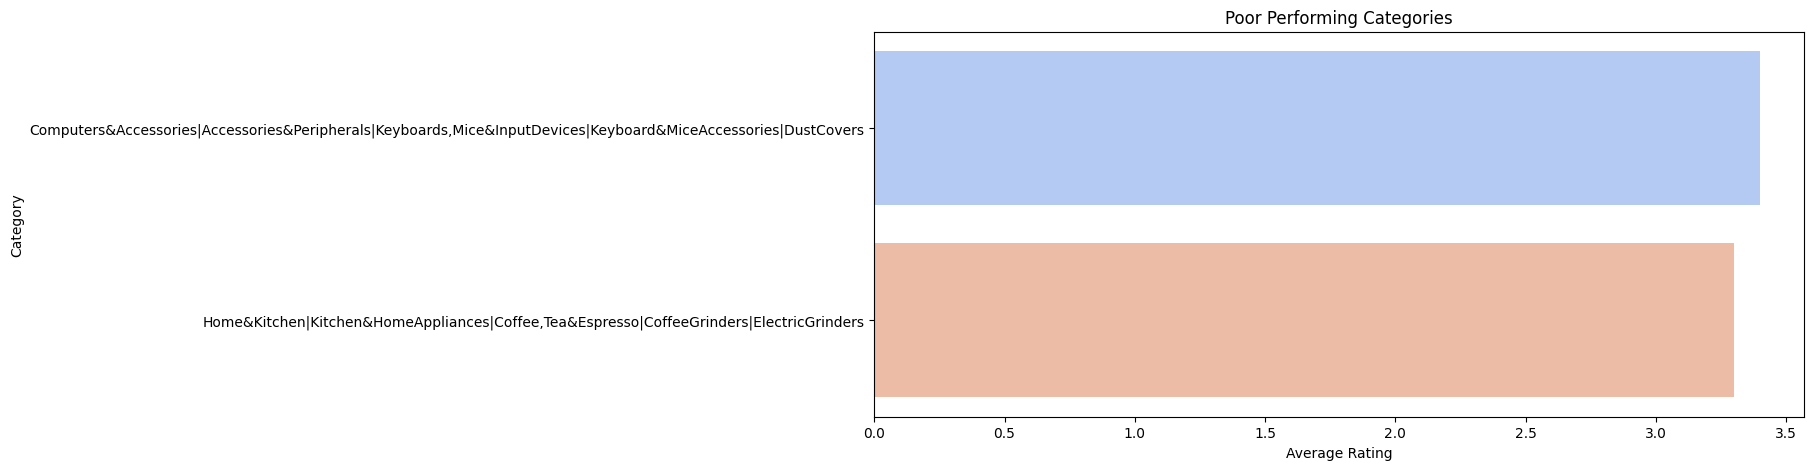

In [ ]:
#10 Identify any potential areas for improvement or optimization based on the data analysis.

# Convert necessary columns to numeric values
df3['discounted_price'] = df3['discounted_price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True).astype(float)
df3['actual_price'] = df3['actual_price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True).astype(float)
df3['discount_percentage'] = df3['discount_percentage'].str.replace('%', '', regex=True).astype(float)
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
df3['rating_count'] = pd.to_numeric(df3['rating_count'].str.replace(',', '', regex=True), errors='coerce')

# 1. Identify Low-Rated Products (rating < 3)
low_rated_products = df3[df3['rating'] < 3]
print("Low-Rated Products:")
print(low_rated_products[['product_name', 'rating', 'rating_count']].head())

# 2. Identify Highly Discounted but Low-Rated Products
discount_low_rated = df3[(df3['discount_percentage'] > 50) & (df3['rating'] < 3)]
print("\nHigh Discount but Low Rating:")
print(discount_low_rated[['product_name', 'discount_percentage', 'rating']].head())

# 3. Identify Poor Performing Categories (Avg Rating < 3.5)
category_performance = df3.groupby('category', as_index=False)['rating'].mean()
poor_categories = category_performance[category_performance['rating'] < 3.5]
print("\nPoor Performing Categories:")
print(poor_categories)

# 4. Identify Products with Low Review Counts (Less than 50 reviews)
low_review_products = df3[df3['rating_count'] < 50]
print("\nProducts with Low Reviews:")
print(low_review_products[['product_name', 'rating_count']].head())
print('     ')

# Visualization: Categories with Low Ratings
plt.figure(figsize=(12, 5))
sns.barplot(y=poor_categories['category'], x=poor_categories['rating'], palette='coolwarm')
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.title("Poor Performing Categories")
plt.show()



# Spotify Data:Popular Hip-Hop Artists and Tracks Dataset (EDA-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df4 = pd.read_csv('spotify.csv')
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [3]:
#1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

df4.head()  # reading data up to 5 rows
missing_values = df4.isnull().sum()  # There is no missing values
print("Missing values in each column: ", missing_values)


# Check for duplicates
dupl = df4.duplicated().sum()  # 27 duplicate
print(f"Total number of duplicate: {dupl}")

df4.drop_duplicates(inplace=True)  # Drop duplicate rows

# Check for duplicates again
dupl_after = df4.duplicated().sum()
print(f"Total number of duplicates after drop: {dupl_after}")

Missing values in each column:  Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Total number of duplicate: 27
Total number of duplicates after drop: 0


The most popular track name: Lovin On Me with popularity: 97



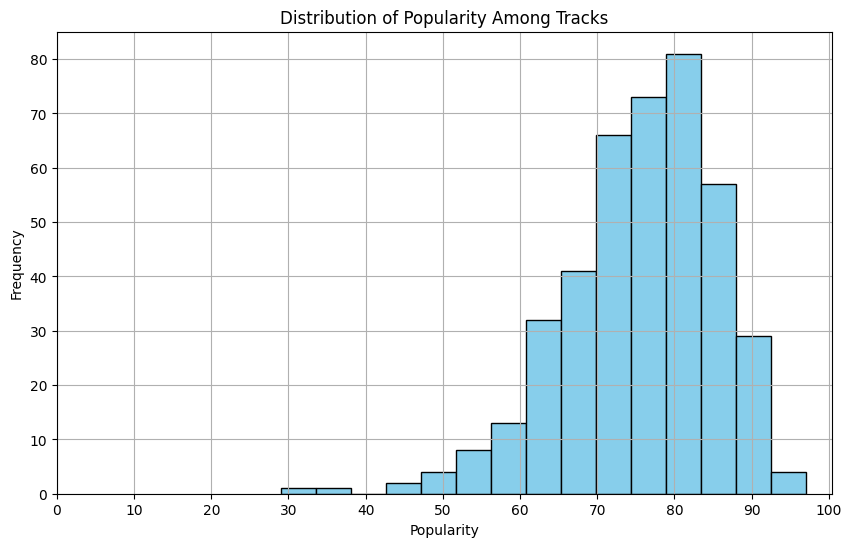

In [4]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

df4.rename(columns={'Track Name': 'Track_Name' , 'Duration (ms)': 'Duration_(ms)' , 'Track ID': 'Track_ID'}, inplace=True)


# Group by 'Track_Name' and find the max popularity for each track
pop_track = df4.groupby('Track_Name')['Popularity'].max()

# Find the most popular track and its popularity value
most_pop_track_name = pop_track.idxmax()  # Track name with highest popularity
most_popularity_value = pop_track.max()  # Max popularity value

print(f"The most popular track name: {most_pop_track_name} with popularity: {most_popularity_value}\n")

# Plot the distribution of popularity
plt.figure(figsize=(10, 6))
plt.hist(pop_track, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(0, 101, 10))  # Set x-axis ticks for better readability
plt.show()


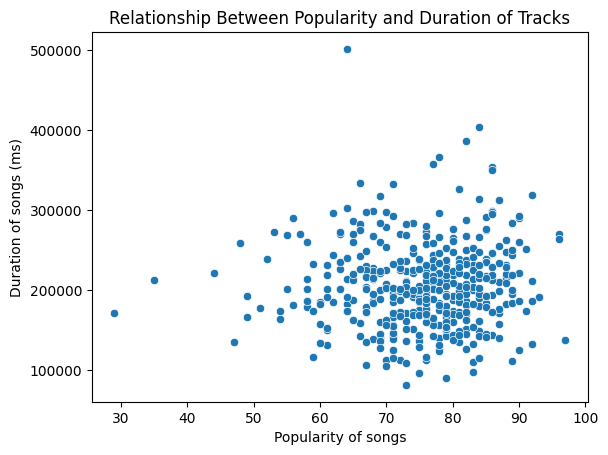




The scatter plot shows the relationship between the popularity and duration of tracks. 
We can visually inspect if there's any clear trend or pattern (positive, negative, or no correlation). 
A further analysis using correlation coefficients or regression could provide more insight into this relationship.


In [55]:
#3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

sns.scatterplot(x=df4['Popularity'],y= df4['Duration_(ms)'])
plt.xlabel('Popularity of songs')
plt.ylabel('Duration of songs (ms)')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.show()


print('\n\n')
# Interpretation
print('''The scatter plot shows the relationship between the popularity and duration of tracks.
We can visually inspect if there's any clear trend or pattern (positive, negative, or no correlation).
A further analysis using correlation coefficients or regression could provide more insight into this relationship.''')



Artist with the highest number of tracks: Drake with 17 tracks





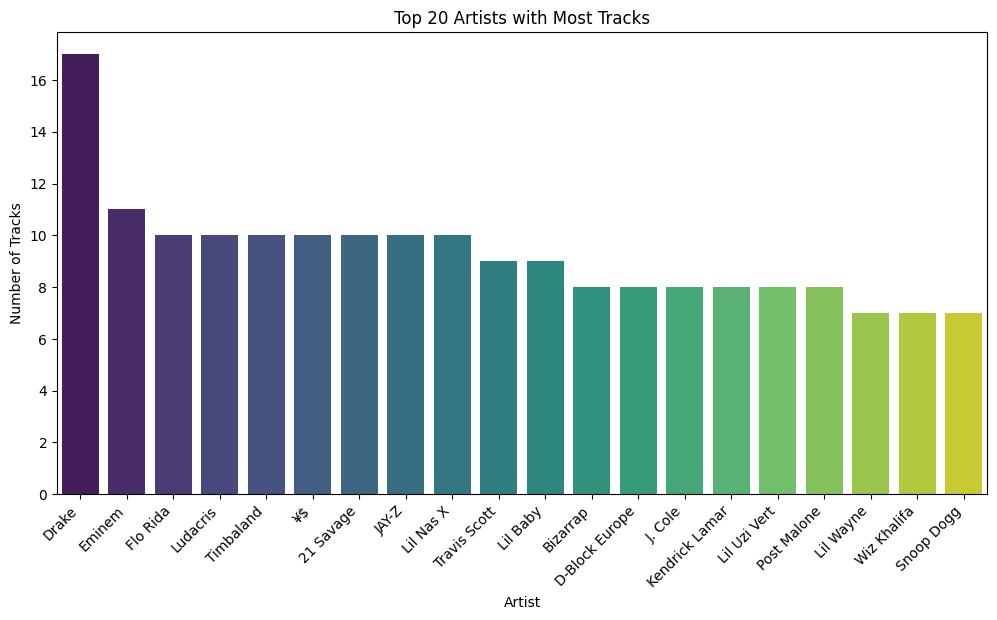

In [111]:
#4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

artist_with_high_track = df4.groupby('Artist')['Track_Name'].count().reset_index()

x = artist_with_high_track.sort_values(by=['Track_Name'], ascending=False).reset_index()[0:1]
print(f"\nArtist with the highest number of tracks: {x['Artist'][0]} with {x['Track_Name'][0]} tracks")
print("\n\n")

# Get the top 20 artists
Top20_count = df4['Artist'].value_counts().head(20).index

# Plot the countplot for the top 20 artists
plt.figure(figsize=(12, 6))
sns.countplot(x='Artist', data=df4[df4['Artist'].isin(Top20_count)], order=Top20_count, palette='viridis')

# Fix label rotation for better readability
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Artists with Most Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.show()

In [20]:
#5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

a = df4.groupby(['Track_Name','Artist'])['Popularity'].max()
a.sort_values(ascending=True)[:5]

,,Popularity
Track_Name,Artist,
Attachments (feat. Coi Leray),Pressa,29
Intentions,Justin Bieber,35
Splash Brothers,French Montana,44
On Me - Remix,Lil Baby,47
911 (feat. Mary J. Blige),Wyclef Jean,48


In [30]:
#6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

avg_highest_pop = df4.groupby('Artist')['Popularity'].mean()
top5_artist = avg_highest_pop.sort_values(ascending=False)[:5]
print(top5_artist)

# Identify the artist with the highest average popularity among the top 5
highest_avg_artist=top5_artist.idxmax()
highest_avg_popularity = top5_artist.max()

print(f"\nThe artist with the highest average popularity among the top 5 is: {highest_avg_artist} with an average popularity of {highest_avg_popularity:.2f}")

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is: cassö with an average popularity of 92.00


In [46]:
#7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top5_artist = df4.groupby('Artist')['Popularity'].max().sort_values(ascending=False).head(5).index

most_pop_track = df4[df4['Artist'].isin(top5_artist)].groupby('Artist').apply(lambda x : x.loc[x['Popularity'].idxmax(), ['Track_Name','Popularity']])

# Print the results
print("\nTop 5 Most Popular Artists and Their Most Popular Tracks:\n")
print(most_pop_track)



Top 5 Most Popular Artists and Their Most Popular Tracks:

                              Track_Name  Popularity
Artist                                              
21 Savage                         redrum          96
Jack Harlow                  Lovin On Me          97
Travis Scott  FE!N (feat. Playboi Carti)          93
cassö                              Prada          92
¥$                              CARNIVAL          96


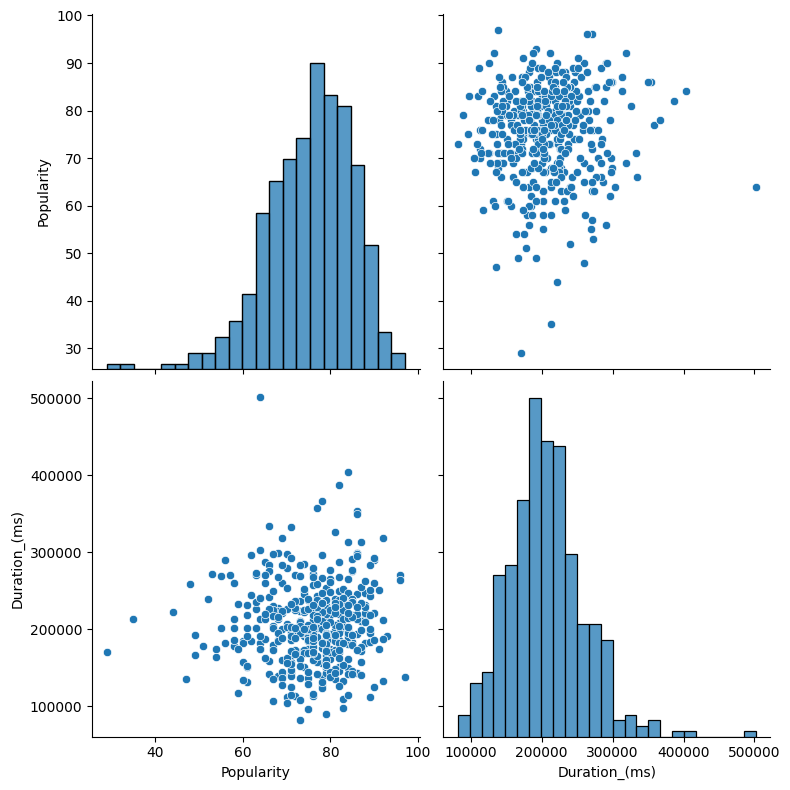

In [57]:
#8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df4, vars=['Popularity','Duration_(ms)'], height=4)
plt.show()

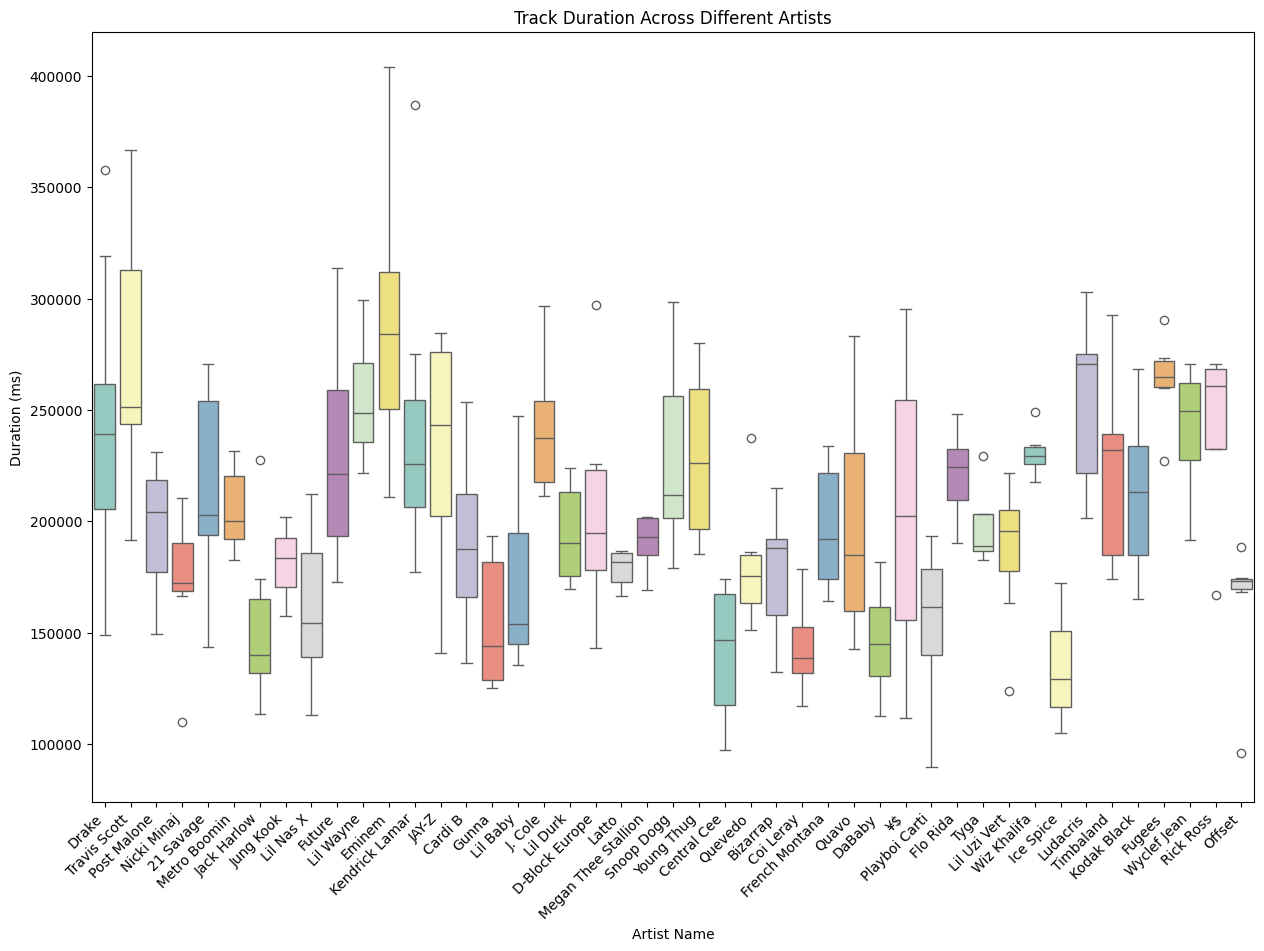

In [77]:
#9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


top_artist = df4['Artist'].value_counts().index[:45]
df_top_artist= df4[df4['Artist'].isin(top_artist)]


plt.figure(figsize=(15,10))
sns.boxplot(x='Artist', y='Duration_(ms)',data=df_top_artist, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Across Different Artists')
plt.show()

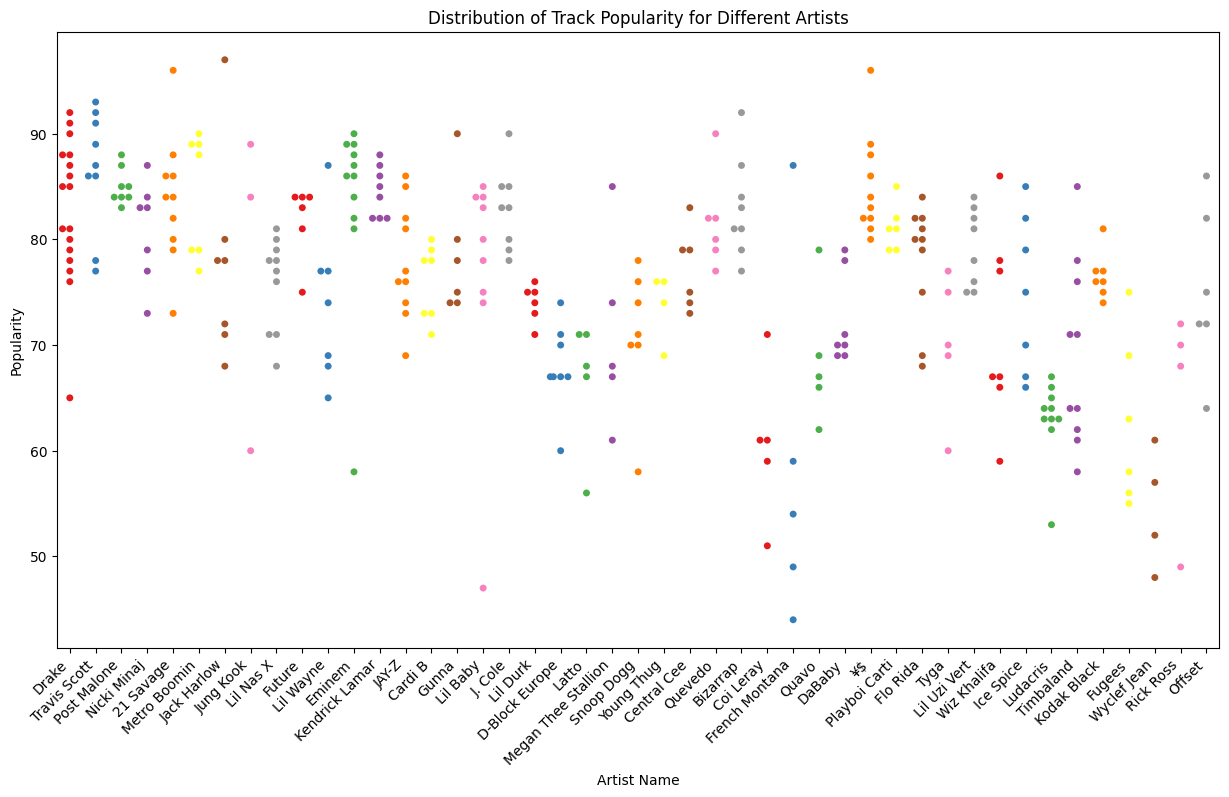

In [83]:
#10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

top_artist_pop = df4['Artist'].value_counts().index[:45]
df_top_artist_pop = df4[df4['Artist'].isin(top_artist_pop)]

plt.figure(figsize=(15,8))
sns.swarmplot(x='Artist', y='Popularity',data=df_top_artist_pop, palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity for Different Artists')
plt.show()